In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from keras import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split

import pywt
import pywt.data

### CIFAR 10


In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']
train_images.shape

(50000, 32, 32, 3)

In [6]:
train_images_grayscale = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in train_images])
test_images_grayscale = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in test_images])

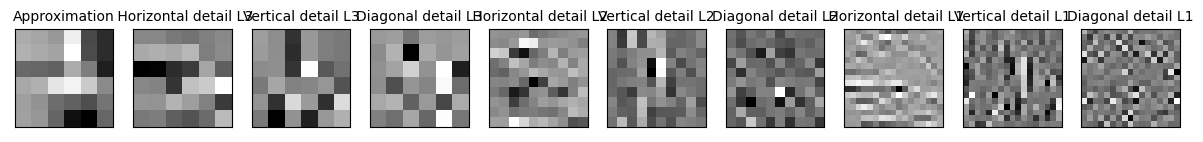

(6, 6)

In [7]:
titles = [  'Approximation', ' Horizontal detail L3',
            'Vertical detail L3', 'Diagonal detail L3',
            ' Horizontal detail L2','Vertical detail L2',
            'Diagonal detail L2', ' Horizontal detail L1',
            'Vertical detail L1','Diagonal detail L1']
db2 = pywt.wavedec2(train_images_grayscale[1], 'db2')
LL3,(LH3, HL3, HH3),(LH2, HL2, HH2) , (LH, HL, HH) = db2
fig = plt.figure(figsize=(12, 10))
for i, a in enumerate([LL3, LH3, HL3, HH3,LH2, HL2, HH2,LH, HL, HH]):
    ax = fig.add_subplot(1, 10, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

new_train_im = []

LH3.shape

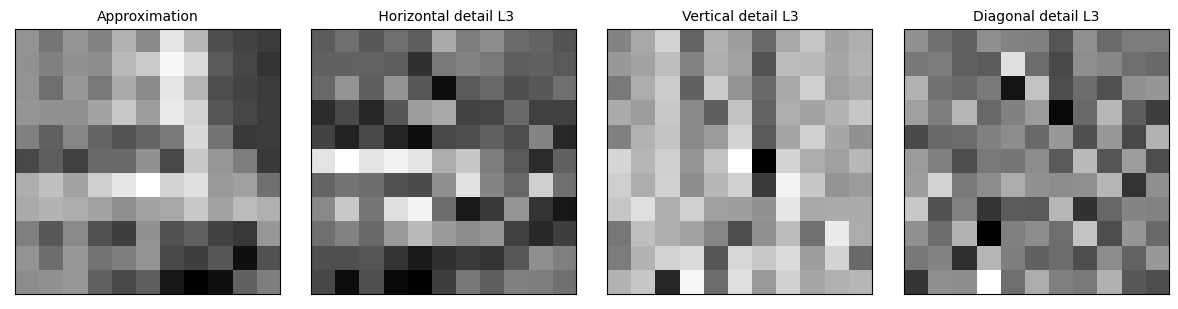

(11, 11)

In [8]:
db3 = pywt.wavedec2(train_images_grayscale[1], 'db3')
LL2,(LH2, HL2, HH2) , (LH, HL, HH) = db3
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL2,LH2, HL2, HH2]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

new_train_im = []
LL2.shape

In [9]:
train_images.shape

(50000, 32, 32, 3)

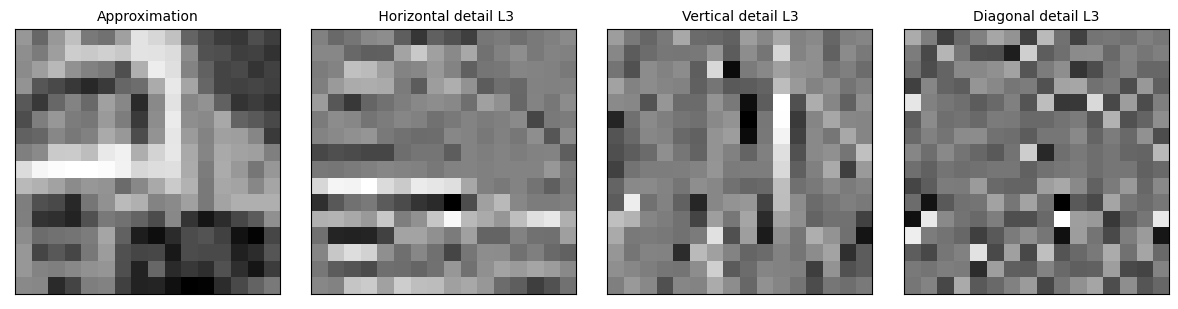

In [10]:
db4 = pywt.dwt2(train_images_grayscale[1], 'db1')
LL, (LH, HL, HH) = db4
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL,LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()



In [11]:
len(train_images_grayscale)

50000

In [12]:
train_images_dwt2 = np.empty(shape=(50000,16,16))
test_images_dwt2 = np.empty(shape=(10000,16,16))

for i in range(len(train_images_grayscale)):
    db4 = pywt.dwt2(train_images_grayscale[i], 'db1')
    LL, (LH, HL, HH) = db4
    train_images_dwt2[i] = LL

for i in range(len(test_images_grayscale)):
    db4 = pywt.dwt2(test_images_grayscale[i], 'db1')
    LL, (LH, HL, HH) = db4
    test_images_dwt2[i] = LL

In [25]:


xTrain_org = np.reshape(train_images_grayscale, (train_images_grayscale.shape[0], -1))
xTest_org = np.reshape(test_images_grayscale, (test_images_grayscale.shape[0], -1))
yTrain = train_labels.flatten()
yTest = test_labels.flatten()

In [14]:
from sklearn.naive_bayes import GaussianNB #NaiveBayes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis #LDA, QDA
from sklearn.neighbors import NearestCentroid #NM
from sklearn.neighbors import KNeighborsClassifier #kNN
from sklearn.svm import SVC #SVM

In [15]:
classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    NearestCentroid(),
    KNeighborsClassifier(n_neighbors=1),
    KNeighborsClassifier(n_neighbors=3),
    KNeighborsClassifier(n_neighbors=5),
    KNeighborsClassifier(n_neighbors=7),
    KNeighborsClassifier(n_neighbors=21),
    # SVC()  
]


In [24]:
def train_test(name, sample, data,label):

    X_train, X_test, y_train, y_test = train_test_split(
        data, label, test_size=sample, shuffle=True
    )
    name.fit(X_train,y_train)
    predicted = name.predict(X_test)

    return predicted, X_test, y_test

In [27]:
for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted = train_test(i, xTrain, xTest)
      sumAcc += metrics.accuracy_score(yTest, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.26909999999999995
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.31259999999999993
Model:  NearestCentroid()
Średnia dokłądności:  0.2503000000000001
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.32900000000000007
Model:  KNeighborsClassifier(n_neighbors=3)
Średnia dokłądności:  0.3106999999999999
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.32189999999999996
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.32209999999999994
Model:  KNeighborsClassifier(n_neighbors=21)
Średnia dokłądności:  0.32019999999999993


In [28]:
for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  for j in range(10):
      model = i
      predicted = train_test(i, xTrain_org, xTest_org)
      sumAcc += metrics.accuracy_score(yTest, predicted)
  meanAcc = sumAcc/10
  print('Średnia dokłądności: ',meanAcc)

Model:  GaussianNB()
Średnia dokłądności:  0.27090000000000003
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.283
Model:  NearestCentroid()
Średnia dokłądności:  0.2517
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.30989999999999995
Model:  KNeighborsClassifier(n_neighbors=3)
Średnia dokłądności:  0.29510000000000003
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.29999999999999993
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.3026
Model:  KNeighborsClassifier(n_neighbors=21)


KeyboardInterrupt: 